![title](img/GMIT-Galway-Campus.jpg)


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import norm
from scipy.stats import ttest_rel
import math
#import random
from math import comb

# Tasks
***

# Task 1: Lady Tasting Tea
### Permutations and Combinations
***

- *1* Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

- *1.1* Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.

- *1.2* Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

- *1.3* Would you accept two errors? Explain.

### About the Lady Tasting Tea dataset

***

The Lady Tasting Tea is a randomized experiment devised by Ronald Fisher and reported in his book The Design of Experiments (1935). The experiment is the original exposition of Fisher's notion of a null hypothesis[1] Lady tasting tea, wikipedia, https://en.wikipedia.org/wiki/Lady_tasting_tea. The experiment provides the subject with eight random cups of tea, four are prepared by adding milk first and then tea & four are prepared by adding tea first and then milk. The way each cup of tea is not known by the subject. The subject attempts to select the 4 cups prepared by one method or the other.

#### Null Hypothesis 

The assumption that the subject had no skill in selecting the correct answer is known as the null hypothesis. It was introduced by Fisher, who also proposed a threshold probability of 1-in-20 or 5 per cent as a limit for statistical significance. [2] How a tea-tasting test led to a breakthrough in statistics, irishtimes, https://www.https://www.irishtimes.com/news/science/how-a-tea-tasting-test-led-to-a-breakthrough-in-statistics-1.3998786
The null hypothesis is assumed to be true unless evidence emerges that indicates that it is invalid.  The null hypothesis is often denoted as H0 :  It represents an assumption that no significant difference, effect, or relationship exists between variables within a population. It serves as a baseline assumption, positing no observed change or effect occurring. The null is the truth or falsity of an idea in analysis. [3] Null Hypothesis, geeksforgeeks, https://www.geeksforgeeks.org/null-hypothesis/.

![title](img/null-hypothesis-example-and-definition.jpg)

The *null hypothesis* proposed by Fisher was that the lady had no real ability to distinguish between the two methods and was guessing. To ascertain the statistical significance of her feat, Fisher used combinatorial analysis. He calculated that the probability of correctly identifying all cups purely by chance was approximately 1 in 70 (p-value < 0.05), sufficiently low for Fisher to reject the H0 (null hypothesis) and conclude that her ability to discern the tea order was statistically significant. [4] LEARN STATISTICS EASILY, statisticseasily, https://statisticseasily.com/lady-tasting-tea


The *alternative hypothesis* is that the lady can distinguish between the two methods.

### *1.1* Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.

To simplify this step I will use *math.comb* which calculates the total number of combinations. The total number of possibilities to choose k things from n items. The math.comb() method returns the number of ways picking k unordered outcomes from n possibilities, without repetition, also known as combinations. The parameters passed in this method must be positive integers.[5] Python math.comb() Method, w3schools, https://www.w3schools.com/python/ref_math_comb.asp.

The followinc code block calculates the probability of selecting 6 cups prepared with milk first

In [3]:
# create variable and asign a value 12, to represent each cup in experiment
no_cups = 12
# create variable and asign a value 6, to represent each cup where milk is added first
no_cups_milk_first = 6
# math.comb returns the number of ways to chose k items from n items without regard to order.
total_ways = math.comb(no_cups, no_cups_milk_first)
print(f'The number of permutations for 12 cups is {total_ways}.')

The number of permutations for 12 cups is 924.


To calculate probabbility we divide 1/924

In [4]:
# Calculate the probability of selecting the correct six cups
probability = 1 / total_ways
print(f"The probability of selecting the correct six cups is {probability:.6f}")

The probability of selecting the correct six cups is 0.001082


The p-value is a number, ofen expressed between 0 & 1, which indicates how likely your data would have occured by random chance
A p-value, or probability value, is a number describing how likely it is that your data would have occurred by random chance (i.e., that the null hypothesis is true). The level of statistical significance is often expressed as a p-value between 0 and 1.The smaller the p-value, the less likely the results occurred by random chance, and the stronger the evidence that you should reject the null hypothesis.[6] P-Value And Statistical Significance: What It Is & Why It Matters, simplypsychology, https://www.simplypsychology.org/p-value.html.

- If the p-value is less than or equal to the significance level (commonly 0.05), we reject the null hypothesis. This indicates that the observed results are statistically significant and unlikely to be due to chance.
- If the p-value is greater than the significance level, we accept the null hypothesis. This indicates that the observed results are not statistically significant and could be due to chance.

In [5]:
if probability > 0.05:
    print("We accept the null hypothesis.")
else:
    print("we reject the null hypothesis.")

we reject the null hypothesis.


### *1.2* Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

I will use code created above which calculated the number of combinations of selecting 6 cups with milk first, which was 924. In addition, I will calculate amount of combinations of correctly selecting 5/6 cups with milk first (1 error) and multiply values

In [6]:
# Total number of cups
no_cups = 12 

# Number of cups with milk in first
no_cups_milk_first = 6

# Calculate the total number of ways to choose 6 cups out of 12
total_ways = math.comb(no_cups, no_cups_milk_first)
print(f'The number of permutations for 12 cups is {total_ways}.')

The number of permutations for 12 cups is 924.


In [7]:
# Calculate the number of ways to choose the correct 6 cups
correct_ways = 1

calculating number of combinations of selcting 5 corrrectly and also by selecting 1 incorrectly

In [8]:
ways_5_correct_1_incorrect = comb(no_cups_milk_first, 5) * comb(no_cups_milk_first,1)
print(f'The number of permutations where 1 error is made is {ways_5_correct_1_incorrect}.')

The number of permutations where 1 error is made is 36.


In [9]:
# Probability of selecting at least 5 correct cups (0 or 1 error)
probability_at_most_1_error = (correct_ways + ways_5_correct_1_incorrect) / total_ways

print(f"The probability where max 1 error is made is {probability_at_most_1_error:.6f}")

The probability where max 1 error is made is 0.040043


In [10]:
if probability_at_most_1_error > 0.05:
    print("We accept the null hypothesis.")
else:
    print("we reject the null hypothesis.")

we reject the null hypothesis.


### *1.3* Would you accept two errors? Explain.

From using variables created above, The following code calculates the probabbility of making @ most 2 errrors

In [11]:
# Calculate the total number of ways to choose 6 items from 12
print(f'The number of permutations for selecting 6 cups with milk first is {total_ways}.')

The number of permutations for selecting 6 cups with milk first is 924.


calculating number of combinations of selcting 4 corrrectly and also by selecting 2 incorrectly

In [12]:
# Calculate the number of ways to make @ most two errors
two_errors = math.comb(6, 4) * math.comb(6, 2)
print(f'The number of permutations for selecting 6 cups with milk first is {two_errors}.')

The number of permutations for selecting 6 cups with milk first is 225.


In [13]:
# Calculate the probability of making @ mosty two errors
result = two_errors / total_ways
print(f"The probability of making @ most two errors (getting 10 out of 12 correct) is {result:.6f}")

The probability of making @ most two errors (getting 10 out of 12 correct) is 0.243506


In [14]:
if result > 0.05:
    print("We accept the null hypothesis.")
else:
    print("we reject the null hypothesis.")

We accept the null hypothesis.


Since the p-value of 0.243 is greater than 0.05 threshold, we accept the null hypothesis. This means that the lady's ability to distinguish the cups could be due to chance, and there is not enough evidence to conclude that she has a real ability to tell the difference.

I would not accept two errrors as this would increase the chances of the person passing the test by guessing. The alpha level is set @ 0.05 (5% chance of incorrectly rejecting null hypotheses). By analysing probability of 2 errors, we can see that it is way higher than 0.05. Accepting one error is a more realistics threshold.

***

# Task 2: numpy's Normal Distribution
***


- 2.1 In this task you will assess whether numpy.random.normal() properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.

- 2.2 Use the scipy.stats.shapiro() function to test whether your sample came from a normal distribution. Explain the results and output.

- 2.3 Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

### about the normal distribution  

The probability density function of the normal distribution is often called the bell curve because of its  shape. It is also called e Gaussian Distribution.  The normal distribution is a continuous probability distribution which is symmetric around the mean. [7] Normal Distribution | Definition, Uses & Examples, geeksforgeeks, https://www.geeksforgeeks.org/normal-distribution/
The parameters are 

-- loc: (mean),
-- scale: (standard deviation) 
-- size: (number to create) 

#### 2.1 
In this task you will assess whether numpy.random.normal() properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.

I will use the following code to generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.

In [15]:
sample = np.random.normal(loc=10, scale=3, size = 100000)

#### 2.2 Use the scipy.stats.shapiro() function to test whether your sample came from a normal distribution. Explain the results and output.

*about scipy.stats.shapiro() function*
The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution. The sample size must be between 3 & 5,000. It evaluates data from a sample with the null hypothesis that the data set is normally distributed. A large p-value indicates the data set is normally distributed, a low p-value indicates that it isn’t normally distributed.[8] An Introduction to the Shapiro-Wilk Test for Normality,  | Definition, Uses & Examples, builtin.com, https://builtin.com/data-science/shapiro-wilk-test. This is imported with *from scipy.stats import shapiro*

Test Statistic W: A value close to 1 indicates that the sample data is close to a normal distribution.

- P-value > 0.05: We fail to reject the null hypothesis. This means there is no significant evidence to suggest that the sample data does not come from a normal distribution.
- P-value ≤ 0.05: We reject the null hypothesis, indicating that the sample data does not come from a normal distribution.

code to calculate p-value and W statistic

In [16]:
stat, p_value = shapiro(sample)
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {p_value}")

Shapiro-Wilk Test Statistic: 0.999985406657717
P-value: 0.988214481491246


c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


In [17]:
# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("The sample appears to come from a normal distribution")
else:
    print("The sample does not appear to come from a normal distribution.")

The sample appears to come from a normal distribution


As demostrated, the p value is greater than alpha of 0.05. We can alse see W statistic is 0.99, so we can assume our sample came from a normal distribution

#### 2.3 Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

The norm.pdf is a function from scipy stats module that computes the the probability density function (PDF) of a normal distribution. Probability Density Function (PDF) is a fundamental concept in probability theory that describes the relative likelihood of values in a continuous distribution. The PDF of a random variable X is defined as the derivative of its cumulative distribution function (CDF). The PDF represents the probability density at each point in the distribution and integrates to 1 over the entire range of values. [9] Working with Scipy Stats Norm: A Guide, pieriantraining.com, https://pieriantraining.com/working-with-scipy-stats-norm-a-guide/

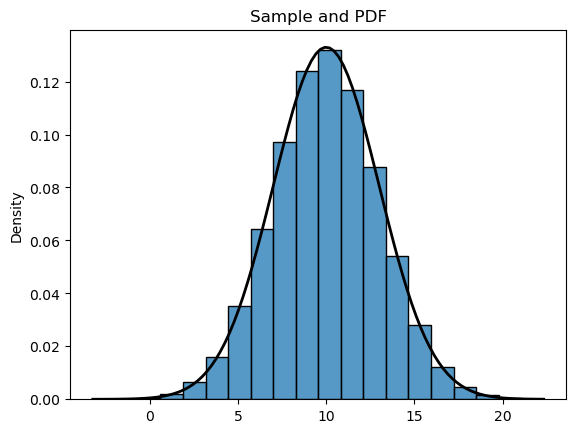

In [18]:
# Plot the normal distribution probability density function (PDF)
mean = 10.0
std_dev = 3.0
# x= 100 points betweeen min and max of sample array
x = np.linspace(min(sample), max(sample), 100)
#ttps://pieriantraining.com/working-with-scipy-stats-norm-a-guide/
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)

#title = "Sample and PDF" 
plt.title("Sample and PDF" )
sns.histplot(sample, bins=20,stat="density")
plt.legend
# Show the plot
plt.show()


***

# Task 3: t-Test Calculation
***

Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.

Patient ID	0	1	2	3	4	5	6	7	8	9 

Before	63	68	70	64	74	67	70	57	66	65 

After	64	64	68	64	73	70	72	54	61	63 


*3.1* Calculate the t-statistic based on this data set, using Python. Compare it to the value given by scipy.stats. Explain your work and list any sources used.

### What is a t-test
A t-test is a statistical test used to compare the means of two groups to determine if they are significantly different from each other. It is commonly used in hypothesis testing to assess whether the observed differences between groups are due to chance or if they reflect true differences. The t test is one of the simplest statistical techniques that is used to evaluate whether there is a statistical difference between the means from up to two different samples. The t test is especially useful when you have a small number of sample observations (under 30 or so), and you want to make conclusions about the larger population. [10] The Ultimate Guide to T Tests, GraphPad, https://www.graphpad.com/guides/the-ultimate-guide-to-t-tests

### how does a t-test work
t tests make enough assumptions about your experiment to calculate an expected variability, and then they use that to determine if the observed data is statistically significant. You can test the difference between these two groups using a t test and null and alterative hypotheses.

The null hypothesis (H0) is that the true difference between these group means is zero. The alternate hypothesis (Ha) is that the true difference is different from zero. [11] An Introduction to t Tests | Definitions, Formula and Examples, Scribbr, https://www.scribbr.com/statistics/t-test/

### Assumptions of a t-test
[12] An Introduction to t Tests | Definitions, Formula and Examples, Scribbr, https://www.scribbr.com/statistics/t-test/

Independence: The observations in each group must be independent of each other.
Normality: The data in each group should be approximately normally distributed.
Homogeneity of Variances: The variances of the two groups should be approximately equal.
Random Sampling: The data should be collected using a random sampling method.
The t-test statistic is calculated using the difference between the group means, the standard deviations, and the sample sizes. Determine the p-value:

The p-value indicates the probability of observing the data, or something more extreme, if the null hypothesis is true. Compare the p-value to the Significance Level ((\alpha)):

If the p-value is less than (\alpha) (commonly 0.05), reject the null hypothesis.

In [19]:
# Data
before = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])
after = np.array([64, 64, 68, 64, 73, 70, 72, 54, 61, 63])


#### Visualising the data

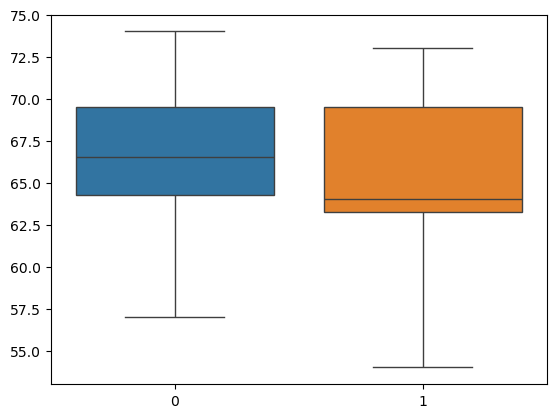

In [20]:
sns.boxplot(data=[before, after]);

Steps :
- Calculate the differences between the before and after values.
- Compute the mean of these differences.
- Calculate the standard deviation of the differences.
- Determine the number of observations.
- Calculate the t-statistic

#### Calculate the t-statistic based on this data set, using Python

In [21]:
# Calculate the differences
differences = before - after

In [22]:
# Calculate the mean of the differences
mean_diff = np.mean(differences)

dd0f means Delta Degrees of Freedom.  The divisor used in calculations is N - ddof, where N represents the number of elements. By default ddof is zero.  [13] numpy.std, NumPy, https://numpy.org/doc/stable/reference/generated/numpy.std.html


The divisor used in the calculation of the standard deviation is ( n - 1 ) instead of ( n ). This adjustment is known as Bessel's correction and is used to provide an unbiased estimate of the population standard deviation from a sample.Using ddof=1 is common practice when calculating the sample standard deviation because it corrects the bias in the estimation of the population variance and standard deviation. Without this correction, the sample standard deviation would tend to underestimate the population standard deviation.  [14] Bessel's correction, WIKIPEDIA, https://en.wikipedia.org/wiki/Bessel%27s_correction

In [23]:
# Calculate the standard deviation of the differences
std_diff = np.std(differences, ddof=1)


In [24]:
# Calculate the number of observations
n = len(differences)

# Calculate the t-statistic
t_statistic_manual = mean_diff / (std_diff / np.sqrt(n))


In [25]:
print(f"T-statistic: {t_statistic_manual:.6f}")


T-statistic: 1.337227


### Compare it to the value given by scipy.stats. Explain your work and list any sources used.

scipy.stats is the SciPy sub-package. It is mainly used for probabilistic distributions and statistical operations. There is a wide range of probability functions.

### Using scipy.stats

In [26]:
# Calculate the t-statistic and p-value for the paired sample
t_statistic, p_value = ttest_rel(before, after)

# Print the results
print(f"T-statistic: {t_statistic:.6f}")
print(f"P-value: {p_value}")

T-statistic: 1.337227
P-value: 0.21396011317404623


In [27]:
# Paired samples t-test.
stats.ttest_rel(before, after)

TtestResult(statistic=1.337227482480628, pvalue=0.21396011317404623, df=9)

In [28]:
t_statistic_manual

1.3372274824806283

In [29]:
t_statistic

1.337227482480628

Both methods return t-statisic value of ~1.337227

***

# Task 4: Anova

In this test we will estimate the probability of committing a type II error in specific circumstances. 

- 4.1 To begin, create a variable called no_type_ii and set it to 0.

- 4.2 Now use a loop to perform the following test 10,000 times.

- 4.3 Use numpy.random.normal to generate three samples with 100 values each. Give each a standard deviation of 0.1. Give the first sample a mean of 4.9, the second a mean of 5.0, and the third a mean of 5.1.

- 4.4.1  Perform one-way anova on the three samples 
- 4.4.2  add 1 to no_type_ii whenever a type II error occurs.

- 4.5 Summarize and explain your results.

### Anova description
Anova stands for Analysis of Variance. Anova is a statistical method used to compare the means of three or more groups to determine if there are any statistically significant differences among them. ANOVA assesses the variability within and between groups to help researchers understand if the observed differences are due to chance or indicate true effects.[15] ANOVA (Analysis of variance),ResearchMethod.Net, https://researchmethod.net/anova/. In short they help determine if the null hypotheses is rehjected or the alternate hypotheses is accepted [16] Anova Formula,geeksforgeeks.org, https://www.geeksforgeeks.org/anova-formula/

### types of Anova
The types of Anova are ; 
- one way Anova which comapres the means of three or more groups based on a single indepent variable 
- two way Anova is used when there are two independent variables 
- repeated measure Anova s used when the same subjects are tested under different conditions over time -- Manova (multivariate) handles multiple dependent variables

A one-way ANOVA uses the following null and alternative hypotheses:

- H0: All group means are equal.
- HA: At least one group mean is different from the rest. [17] What Does a High F Value Mean in ANOVA?, statology, https://www.statology.org/what-does-a-high-f-value-mean/

Results of Anova
The F-statistic The F- statisic is the ratio of the mean squares treatment to the mean squares error:
- F-statistic: Mean Squares Treatment / Mean Squares Error

*The larger the F-statistic, the greater the variation between sample means relative to the variation within the samples.*

p-value To determine if the difference between group means is statistically significant, we can look at the p-value that corresponds to the F-statistic. To find the p-value that corresponds to this F-value, we can use an F Distribution Calculator with numerator degrees of freedom = df Treatment and denominator degrees of freedom = df Error.
The F statistic must be used in combination with the p value when you are deciding if your overall results are significant. [18] F Statistic / F Value: Simple Definition and Interpretation, Statistics How To, https://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/

#### 4.1 To begin, create a variable called no_type_ii and set it to 0.

In [30]:
# Initialize the variable @ 0
no_type_ii = 0

#### 4.2 Now use a loop to perform the following test 10,000 times.
#### 4.3 Use numpy.random.normal to generate three samples with 100 values each. Give each a standard deviation of 0.1. Give the first sample a mean of 4.9, the second a mean of 5.0, and the third a mean of 5.1.

In [31]:
# Perform the test 10,000 times
for _ in range(10000):
    # Generate three samples with 100 values with std dev @ 0.1 and mean of 4.9,5 & 5.1
    sample1 = np.random.normal(4.9, 0.1, 100)
    sample2 = np.random.normal(5.0, 0.1, 100)
    sample3 = np.random.normal(5.1, 0.1, 100)

    data = np.concatenate([sample1, sample2, sample3])


### 4. 4.1 Perform one-way anova on the three samples 

In [32]:
#Create the labels.
labels = ['sample1'] * 100 + ['sample2'] * 100 + ['sample3'] * 100

# Show.
#labels
df = pd.DataFrame({'sample': labels, 'value': data})
#df
a_sample = df[df['sample'] == 'sample1']['value']
b_sample = df[df['sample'] == 'sample2']['value']
c_sample = df[df['sample'] == 'sample3']['value']

In [33]:
# Perform ANOVA.
f_statistic, p_value = stats.f_oneway(a_sample , b_sample , c_sample )
print(f"f_statistic: {f_statistic:.6f}")
print(f"p_value: {p_value:.6f}")
#print(f"F-statistic: {f_statistic}, p-value: {p_value}")

f_statistic: 121.123487
p_value: 0.000000


In [34]:
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between groups a_sample,b_sample & c_sample.")
else:
    print("There is no significant difference between groups a_sample,b_sample & c_sample.")

There is a significant difference between groups a_sample,b_sample & c_sample.


### 4.4.2 add 1 to no_type_ii whenever a type II error occurs

### types of errror
 a Type I error is a false positive conclusion, while a Type II error is a false negative conclusion. The probability of making a Type I error is the significance level, or alpha (α), while the probability of making a Type II error is beta (β). These risks can be minimized through careful planning in your study design.  [19] TType I & Type II Errors | Differences, Examples, Visualizations, scribbr, https://www.scribbr.com/statistics/type-i-and-type-ii-errors/

-- Rejecting the null hypothesis when it is in fact true is called a *Type I error*. 
-- Not rejecting the null hypothesis when in fact the alternate hypothesis is true is called a *Type II error*. [20] Type I and II Errors and Significance Levels, web.ma.utexas.edu, https://web.ma.utexas.edu/users/mks/statmistakes/errortypes.html

In [35]:
if p_value > .05:
    no_type_ii+=1
    print(f"Number of Type II errors: {no_type_ii}")
else:
    print('There are no type II errors')

There are no type II errors


- 4.5 Summarize and explain your results.

#### Results of Anova 
The results of the Anova test are;
- f_statistic value of [f_statistic],
- p_value of [p_value] 

The f_statistic is a ratio that compares the variance between the group means to the variance within the groups. A high f_statistic indicates that the variance between the group means is large relative to the variance within the groups. The higher the F-value, the lower the corresponding p-value. [21] What Does a High F Value Mean in ANOVA?, statology, https://www.statology.org/what-does-a-high-f-value-mean/

A very low p_value (much less than 0.05) indicates that the observed differences between group means are highly unlikely to have occurred by chance. We can reject the null hypothesis and conclude that there are statistically significant differences between the means of the three samples. The one-way ANOVA test shows that there are significant differences between the means of the three samples. The high f_statistic and extremely low p_value confirm that the means of 4.9, 5.0, and 5.1 are not equal and that these differences are statistically significant.

# References

- [1] Lady tasting tea, wikipedia, https://en.wikipedia.org/wiki/Lady_tasting_tea. 
- [2] How a tea-tasting test led to a breakthrough in statistics, irishtimes, https://www.https://www.irishtimes.com/news/science/how-a-tea-tasting-test-led-to-a-breakthrough-in-statistics-1.3998786
- [3] Null Hypothesis, geeksforgeeks, https://www.geeksforgeeks.org/null-hypothesis/
- [4] LEARN STATISTICS EASILY, statisticseasily, https://statisticseasily.com/lady-tasting-tea
- [5] Python math.comb() Method, w3schools, https://www.w3schools.com/python/ref_math_comb.asp
- [6] P-Value And Statistical Significance: What It Is & Why It Matters, simplypsychology, https://www.simplypsychology.org/p-value.html
- [7] Normal Distribution | Definition, Uses & Examples, geeksforgeeks, https://www.geeksforgeeks.org/normal-distribution/
- [8] An Introduction to the Shapiro-Wilk Test for Normality,  | Definition, Uses & Examples, builtin.com, https://builtin.com/data-science/shapiro-wilk-test
- [9] Working with Scipy Stats Norm: A Guide, pieriantraining.com, https://pieriantraining.com/working-with-scipy-stats-norm-a-guide/
- [10] The Ultimate Guide to T Tests, GraphPad, https://www.graphpad.com/guides/the-ultimate-guide-to-t-tests
- [11] An Introduction to t Tests | Definitions, Formula and Examples, Scribbr, https://www.scribbr.com/statistics/t-test/
- [12] An Introduction to t Tests | Definitions, Formula and Examples, Scribbr, https://www.scribbr.com/statistics/t-test/
- [13] numpy.std, NumPy, https://numpy.org/doc/stable/reference/generated/numpy.std.html
- [14] Bessel's correction, WIKIPEDIA, https://en.wikipedia.org/wiki/Bessel%27s_correction
- [15] ANOVA (Analysis of variance),ResearchMethod.Net, https://researchmethod.net/anova/
- [16] Anova Formula,geeksforgeeks.org, https://www.geeksforgeeks.org/anova-formula/
- [17] What Does a High F Value Mean in ANOVA?, statology, https://www.statology.org/what-does-a-high-f-value-mean/
- [18] F Statistic / F Value: Simple Definition and Interpretation, Statistics How To, https://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/
- [19] TType I & Type II Errors | Differences, Examples, Visualizations, scribbr, https://www.scribbr.com/statistics/type-i-and-type-ii-errors/
- [20] Type I and II Errors and Significance Levels, web.ma.utexas.edu, https://web.ma.utexas.edu/users/mks/statmistakes/errortypes.html
- [21] What Does a High F Value Mean in ANOVA?, statology, https://www.statology.org/what-does-a-high-f-value-mean/